In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
# Load the cleaned dataset
file_path = '../data/SampleSuperstore_Cleaned.csv'
df = pd.read_csv(file_path)

In [73]:
# Check the cleaned dataset
print(df.columns.tolist())
df.head()

['Row ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales']


,Row ID,Order Date,Ship Date,Ship Mode,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,08/11/2017,11/11/2017,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,08/11/2017,11/11/2017,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,12/06/2017,16/06/2017,Second Class,Darrin Van Huff,Corporate,United States,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,11/10/2016,18/10/2016,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,11/10/2016,18/10/2016,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [74]:
# Check data types
print(df.dtypes)

Row ID             int64
Order Date        object
Ship Date         object
Ship Mode         object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
dtype: object


In [75]:
# Convert dates to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d/%m/%Y')

In [76]:
# Check datetime conversion
print(df.dtypes)

Row ID                    int64
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
dtype: object


In [77]:
# Check Category values
category_values = df['Category'].unique().tolist()
print(category_values)

['Furniture', 'Office Supplies', 'Technology']


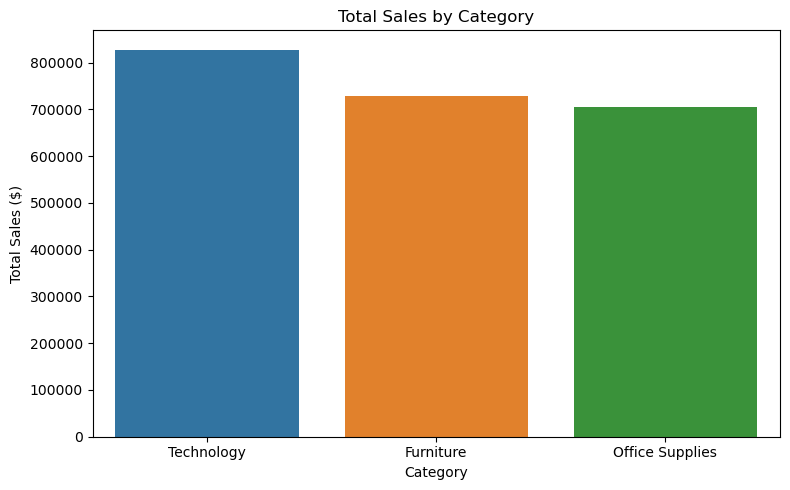

In [78]:
# Total sales by Category
category_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)

# Visualization
plt.figure(figsize=(8,5))
sns.barplot(x=category_sales.index, y=category_sales.values)
plt.title('Total Sales by Category')
plt.ylabel('Total Sales ($)')
plt.xlabel('Category')
plt.tight_layout()
plt.savefig('../outputs/total_sales_by_category.png')
plt.show()

In [79]:
# Check Sub-Category values
sub_category_values = df['Sub-Category'].unique().tolist()
print(sub_category_values)

['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage', 'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper', 'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines', 'Copiers']


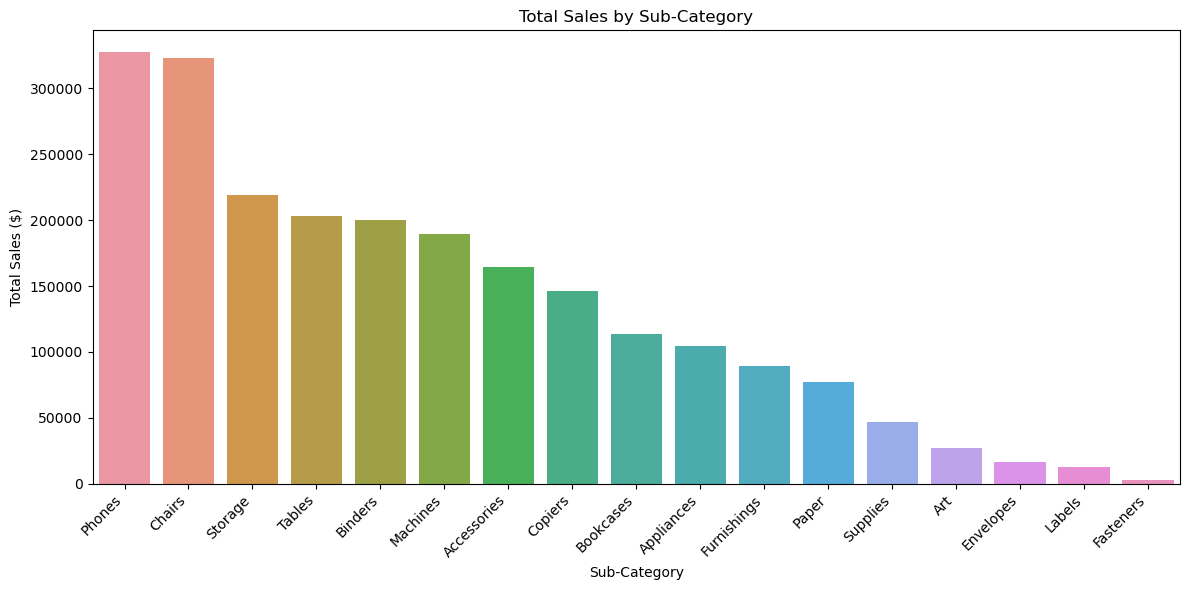

In [80]:
# Total sales by Sub-Category
subcategory_sales = df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False)

# Visualization
plt.figure(figsize=(12,6))
sns.barplot(x=subcategory_sales.index, y=subcategory_sales.values)
plt.title('Total Sales by Sub-Category')
plt.ylabel('Total Sales ($)')
plt.xlabel('Sub-Category')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('../outputs/total_sales_by_sub_category.png')
plt.show()

In [81]:
# Check Region values
region_values = df['Region'].unique().tolist()
print(region_values)

['South', 'West', 'Central', 'East']


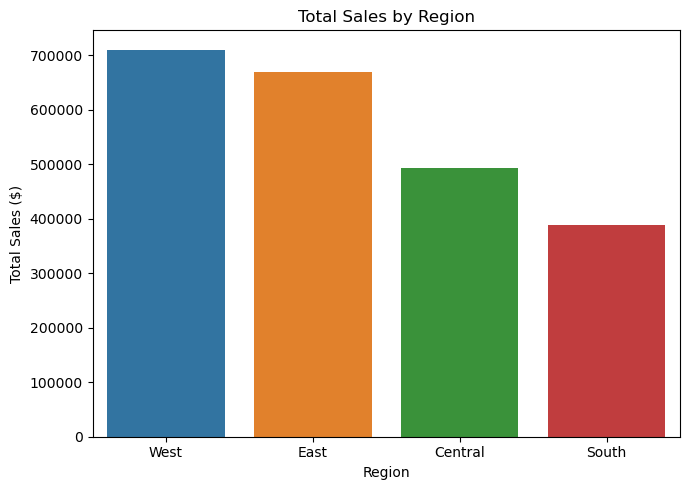

In [82]:
# Total sales by Region
region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)

# Visualization
plt.figure(figsize=(7,5))
sns.barplot(x=region_sales.index, y=region_sales.values)
plt.title('Total Sales by Region')
plt.ylabel('Total Sales ($)')
plt.xlabel('Region')
plt.tight_layout()
plt.savefig('../outputs/total_sales_by_region.png')
plt.show()

In [83]:
# Description of Sales
sales_description = df['Sales'].describe()
print(sales_description)

count     9800.000000
mean       230.769059
std        626.651875
min          0.444000
25%         17.248000
50%         54.490000
75%        210.605000
max      22638.480000
Name: Sales, dtype: float64


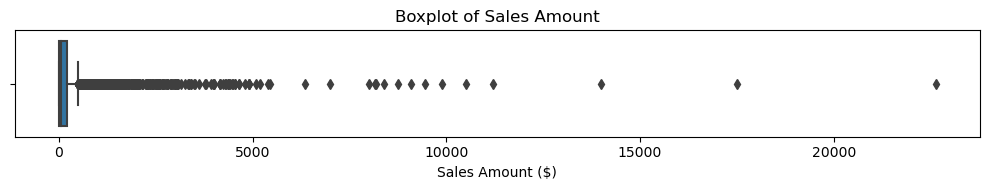

In [84]:
# Boxplot of Sales Amount
plt.figure(figsize=(10,2))
sns.boxplot(x=df['Sales'])
plt.title('Boxplot of Sales Amount')
plt.xlabel('Sales Amount ($)')
plt.tight_layout()
plt.savefig('../outputs/boxplot_of_sales_amount.png')
plt.show()

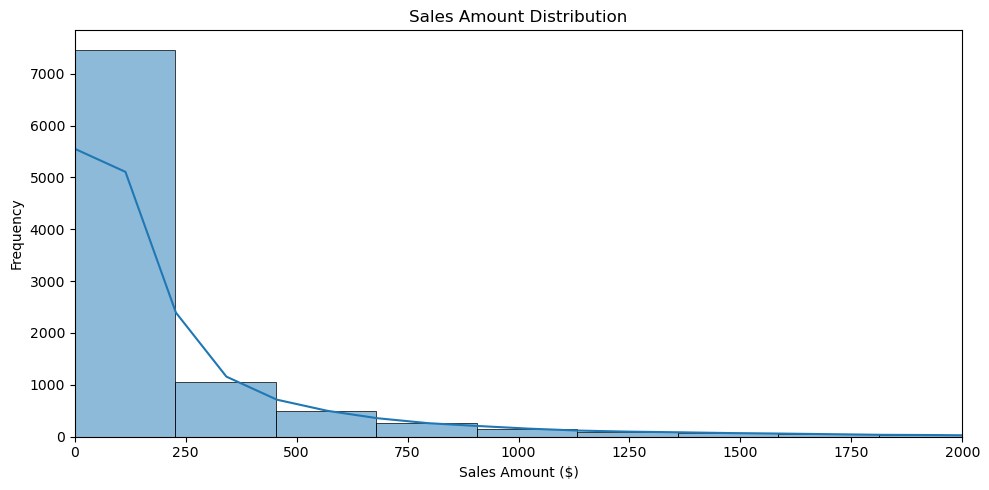

In [85]:
# Distribution of Sales Amount with density estimate
plt.figure(figsize=(10,5))
sns.histplot(df['Sales'], bins=100, kde=True)
plt.title('Sales Amount Distribution')
plt.xlabel('Sales Amount ($)')
plt.ylabel('Frequency')
plt.xlim(0, 2000)
plt.tight_layout()
plt.savefig('../outputs/sales_amount_distribution.png')
plt.show()